**Data exploration**

---

The goal of this project is to build a model to predict likelihood of working in a STEM (Science, Technology, Engineering, and Math) career based on basic demographics: Age, sex, race, state of origin.

The inspiration for this project comes from a series of 2011 reports by the US Department of Commerce, showing that women and racial minorities are underrpresented in stem fields in two ways: They represent a disproportionatly small percentage of STEM degree holders, as well as STEM workers. These reports are linked below:

"Women in STEM: A Gender Gap to Innovation"
"Education Supports Racial and Ethnic Equality in STEM"

In order to quantify these differences and compare the effects of individual demographic predictors, we've created a nueral network model. 

With this model, we provide a high level overview of which demographic features are most likely to influence disparities at the level of education, and which are most likely to influence disparities at the level of hiring.

In [ ]:
# Creating a dataset directory
!mkdir ./datasets

mkdir: cannot create directory ‘./datasets’: File exists


In [ ]:
import pandas as pd

df = pd.read_csv('./df_main.csv')

In [ ]:
len(df)

731797

In [ ]:
df.head()

,AGEP,SEX,HISP,POBP,RAC1P,SCIENGP,SOCP,State,sex_recode,race_recode,detailed_hispanic_origin,science_degree,science_occupation,hisp_recode,intercept,sex_age
0,19,1,1,28,1,NaN,NaN,Mississippi,Female,White,Not Spanish/Hispanic/Latino,0.0,0,Not Spanish/Hispanic/Latino,1.0,19.0
1,55,1,1,1,2,NaN,411011,Alabama,Female,Black,Not Spanish/Hispanic/Latino,0.0,0,Not Spanish/Hispanic/Latino,1.0,55.0
2,56,0,1,1,2,NaN,493050,Alabama,Male,Black,Not Spanish/Hispanic/Latino,0.0,0,Not Spanish/Hispanic/Latino,1.0,0.0
3,21,0,1,1,2,NaN,NaN,Alabama,Male,Black,Not Spanish/Hispanic/Latino,0.0,0,Not Spanish/Hispanic/Latino,1.0,0.0
4,21,1,1,1,2,NaN,NaN,Alabama,Female,Black,Not Spanish/Hispanic/Latino,0.0,0,Not Spanish/Hispanic/Latino,1.0,21.0


#drop unnecessary **columns**

In [ ]:
#drop unnecessary columns
df = df.drop(['HISP','POBP','RAC1P','SCIENGP','SOCP','hisp_recode','intercept','sex_age'], axis=1)
df.head()

,AGEP,SEX,State,sex_recode,race_recode,detailed_hispanic_origin,science_degree,science_occupation
0,19,1,Mississippi,Female,White,Not Spanish/Hispanic/Latino,0.0,0
1,55,1,Alabama,Female,Black,Not Spanish/Hispanic/Latino,0.0,0
2,56,0,Alabama,Male,Black,Not Spanish/Hispanic/Latino,0.0,0
3,21,0,Alabama,Male,Black,Not Spanish/Hispanic/Latino,0.0,0
4,21,1,Alabama,Female,Black,Not Spanish/Hispanic/Latino,0.0,0


In [ ]:
len(df)

731797

# Drop rows with None/NaN values


In [ ]:
# Drop rows with None/NaN values
df=df.dropna()
df = df[df.AGEP >= 20]

In [ ]:
len(df)

416449

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline will lead to embbeded static images in the notebook
%matplotlib inline 


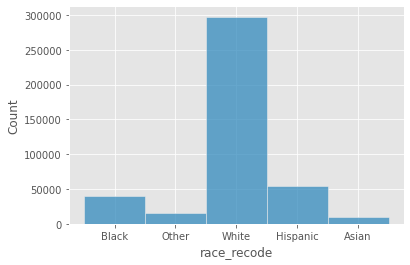

In [ ]:
sns.histplot(data=df, x="race_recode")

In [ ]:
temp_df=df[df.race_recode == 'White'].sample(frac=0.88)
df=df.drop(temp_df.index)

In [ ]:
len(df)

154786

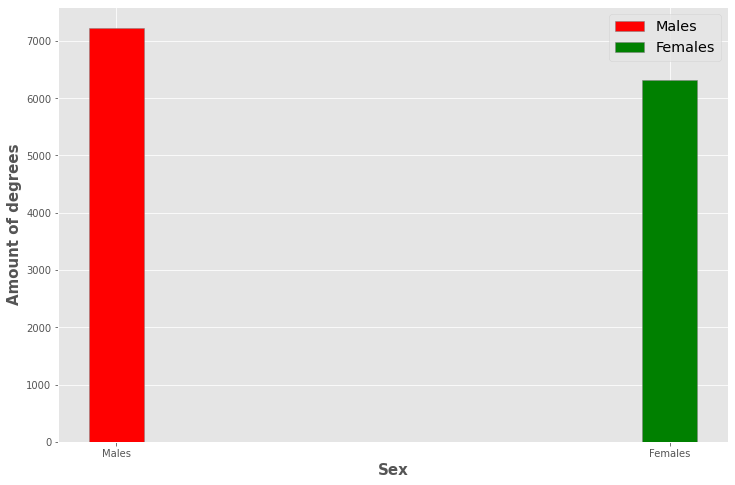

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 1
fig = plt.subplots(figsize =(12, 8))

# set height of bar

br1=df[(df['SEX'] ==0) &(df['science_degree'] == 1.0)]['SEX'].count() #male
br2=df[(df['SEX'] ==1) &(df['science_degree'] == 1.0)]['SEX'].count() #female




 
# Make the plot
plt.bar(10, br1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Males')
plt.bar(20, br2, color ='g', width = barWidth,
        edgecolor ='grey', label ='Females')
 
# Adding Xticks
plt.xlabel('Sex', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of degrees', fontweight ='bold', fontsize = 15)
plt.xticks([10,20],['Males', 'Females'])
 
plt.legend(fontsize="x-large")
plt.show()

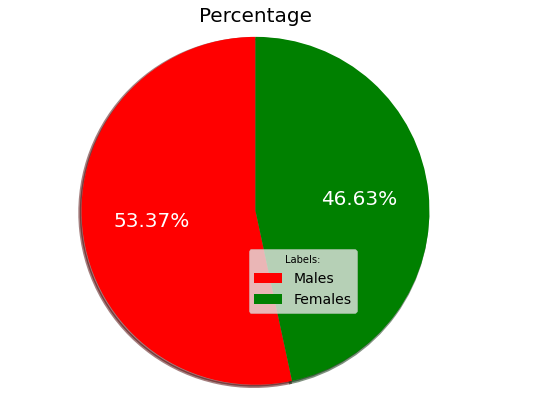

In [ ]:
names_list = ['Males','Females']
sizes = [br1,br2]

plt.pie(sizes, labels=names_list, autopct='%1.2f%%',colors=['red','green'],radius=2,wedgeprops={'linewidth': 3.0,},shadow=True, startangle=90,textprops={'color':"w",'size':20})

plt.title(label="Percentage",
          fontsize=20,
          color="Black", fontweight=10, 
          pad='80.0')
plt.legend(loc='lower right',prop={'size': 14},title='Labels:')
plt.show() 

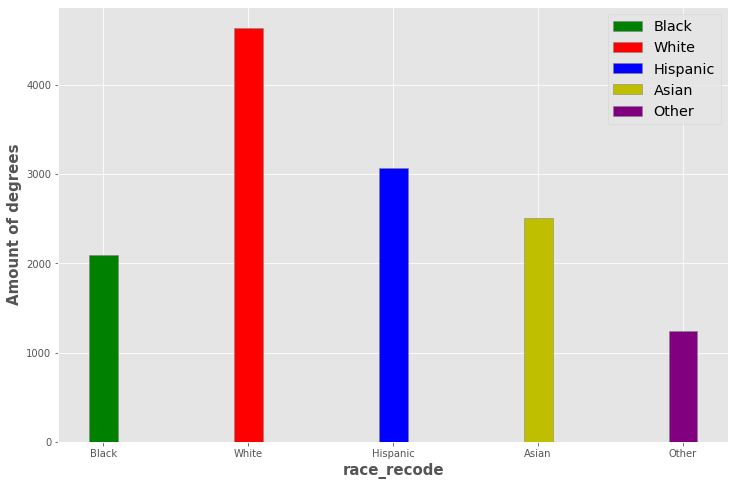

In [ ]:
barWidth = 1.0
fig = plt.subplots(figsize =(12, 8))

# set height of bar

br1=df[(df['race_recode'] =="Black") &(df['science_degree'] == 1.0)]['race_recode'].count()
br2=df[(df['race_recode'] =="White") &(df['science_degree'] == 1.0)]['race_recode'].count()

br3=df[(df['race_recode'] =="Hispanic") &(df['science_degree'] == 1.0)]['race_recode'].count()
br5=df[(df['race_recode'] =="Other") &(df['science_degree'] == 1.0)]['race_recode'].count()
br4=df[(df['race_recode'] =="Asian") &(df['science_degree'] == 1.0)]['race_recode'].count()


 
# Make the plot
plt.bar(10, br1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Black')
plt.bar(15, br2, color ='r', width = barWidth,
        edgecolor ='grey', label ='White')
plt.bar(20, br3, color ='b', width = barWidth,
        edgecolor ='grey', label ='Hispanic')
plt.bar(25, br4, color ='y', width = barWidth,
        edgecolor ='grey', label ='Asian')
plt.bar(30, br5, color ='purple', width = barWidth,
        edgecolor ='grey', label ='Other')
 
# Adding Xticks
plt.xlabel('race_recode', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of degrees', fontweight ='bold', fontsize = 15)

plt.xticks([10,15,20,25,30],['Black', 'White','Hispanic','Asian','Other'])
plt.legend(fontsize="x-large")
plt.show()

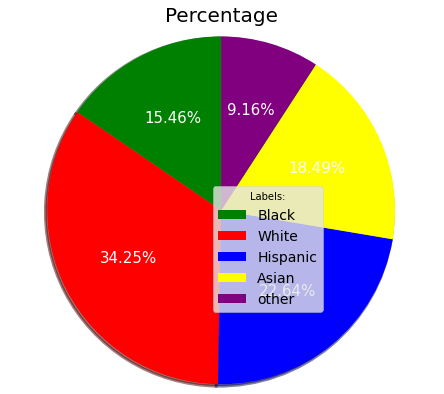

In [ ]:
names_list = ['Black', 'White','Hispanic','Asian','other']
sizes = [br1,br2,br3,br4,br5]

plt.pie(sizes, labels=names_list, autopct='%1.2f%%',colors=['green','red','blue','yellow','purple'],radius=2,wedgeprops={'linewidth': 3.0,},shadow=True, startangle=90,textprops={'color':"w",'size':15})

plt.title(label="Percentage",
          fontsize=20,
          color="Black", fontweight=10, 
          pad='80.0')
plt.legend(loc='lower right',prop={'size': 14},title='Labels:')
plt.show() 

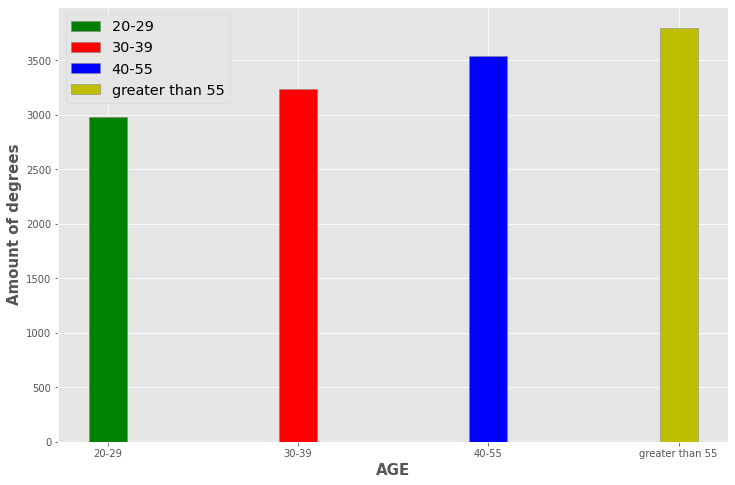

In [ ]:
barWidth = 1.0
fig = plt.subplots(figsize =(12, 8))

# set height of bar

br10=df[(df['AGEP'] >=20) &(df['AGEP'] <=29) &(df['science_degree'] == 1.0)]['AGEP'].count()
br20=df[(df['AGEP'] >=30) &(df['AGEP'] <=39) &(df['science_degree'] == 1.0)]['AGEP'].count()

br30=df[(df['AGEP'] >=40) &(df['AGEP'] <=54) &(df['science_degree'] == 1.0)]['AGEP'].count()
br40=df[(df['AGEP'] >=55) &(df['science_degree'] == 1.0)]['AGEP'].count()


 
# Make the plot
plt.bar(10, br10, color ='g', width = barWidth,
        edgecolor ='grey', label ='20-29')
plt.bar(15, br20, color ='r', width = barWidth,
        edgecolor ='grey', label ='30-39')
plt.bar(20, br30, color ='b', width = barWidth,
        edgecolor ='grey', label ='40-55')
plt.bar(25, br40, color ='y', width = barWidth,
        edgecolor ='grey', label ='greater than 55')
 
# Adding Xticks
plt.xlabel('AGE', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of degrees', fontweight ='bold', fontsize = 15)

plt.xticks([10,15,20,25],['20-29', '30-39','40-55','greater than 55'])
plt.legend(fontsize="x-large")
plt.show()

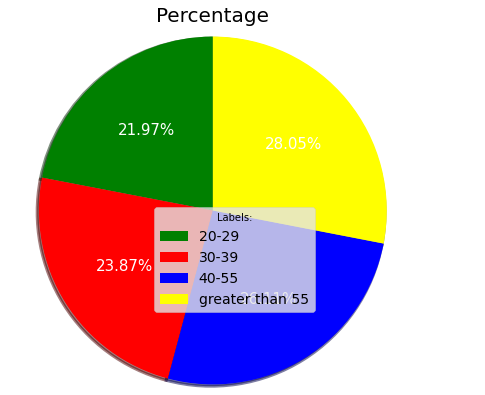

In [ ]:
names_list = ['20-29', '30-39','40-55','greater than 55']
sizes = [br10,br20,br30,br40]

plt.pie(sizes, labels=names_list, autopct='%1.2f%%',colors=['green','red','blue','yellow'],radius=2,wedgeprops={'linewidth': 3.0,},shadow=True, startangle=90,textprops={'color':"w",'size':15})

plt.title(label="Percentage",
          fontsize=20,
          color="Black", fontweight=10, 
          pad='80.0')
plt.legend(loc='lower right',prop={'size': 14},title='Labels:')
plt.show() 

# **Creating histograms for columns**

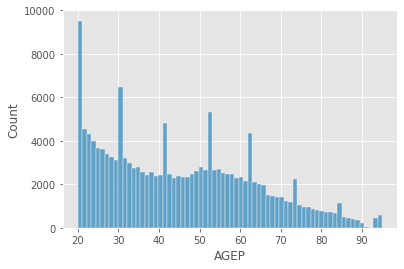

In [ ]:
sns.histplot(data=df, x="AGEP")

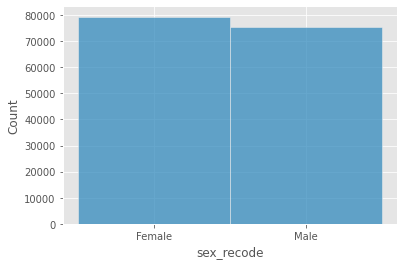

In [ ]:
sns.histplot(data=df, x="sex_recode")

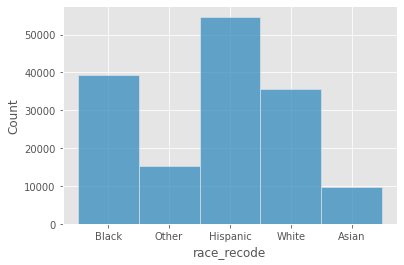

In [ ]:
sns.histplot(data=df, x="race_recode")

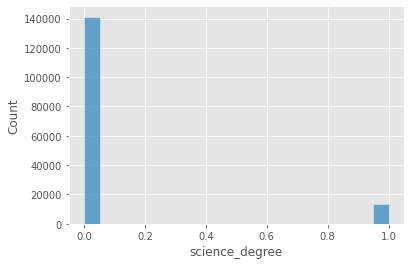

In [ ]:
sns.histplot(data=df, x="science_degree")

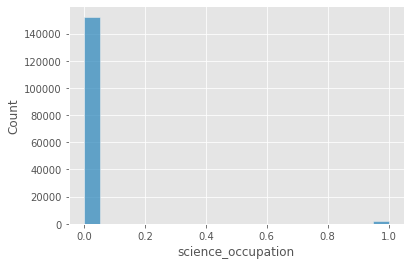

In [ ]:
sns.histplot(data=df, x="science_occupation")

#Represent all the hispanic origins

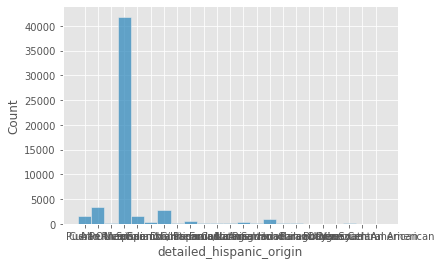

In [ ]:
hispnaic_origins_df=df[df['detailed_hispanic_origin']!='Not Spanish/Hispanic/Latino']
sns.histplot(data=hispnaic_origins_df, x="detailed_hispanic_origin")

In [ ]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
state_to_abbrev = dict(map(reversed, states.items()))

In [ ]:
state_to_abbrev
#https://wellsr.com/python/creating-python-choropleth-maps-with-plotly/

{'Alaska': 'AK',
 'Alabama': 'AL',
 'Arkansas': 'AR',
 'Arizona': 'AZ',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'District of Columbia': 'DC',
 'Delaware': 'DE',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Iowa': 'IA',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Massachusetts': 'MA',
 'Maryland': 'MD',
 'Maine': 'ME',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Missouri': 'MO',
 'Mississippi': 'MS',
 'Montana': 'MT',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Nebraska': 'NE',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'Nevada': 'NV',
 'New York': 'NY',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Virginia': 'VA',
 'Vermont': 'VT',
 'Washington': 'WA',
 'Wisconsin': 'WI',
 'West Virginia': 'WV',
 'Wyoming': 'WY

#Amount of people in each State

In [ ]:
amount_of_states=[]
df_states=df['State'].to_list()
for state in list(state_to_abbrev.keys()):
  amount_of_states.append(df_states.count(state))

In [ ]:
len(df)

154786

In [ ]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(df,  # Input Pandas DataFrame
                    locations=list(states.keys()),  # DataFrame column with locations
                    color=amount_of_states,  # DataFrame column with color values
                    hover_name=list(states.values()), # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings based on amount of samples taken from each state', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

#Amount of degrees in each State


In [ ]:
temp=list(df.loc[df['science_degree'] == 1.0, 'State'])
amount_of_degrees=[]
for state in list(state_to_abbrev.keys()):
  amount_of_degrees.append(temp.count(state))

In [ ]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(df,  # Input Pandas DataFrame
                    locations=list(states.keys()),  # DataFrame column with locations
                    color=amount_of_degrees,  # DataFrame column with color values
                    hover_name=list(states.values()), # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings based on amount of degrees in each state', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

In [ ]:
import turicreate as tc

In [ ]:
sf = tc.SFrame(df)
sf['science_degree'] = sf['science_degree'].astype(int)

In [ ]:
test, train  = sf.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )

Train size 123578
Test size: 31208


In [ ]:
sf

AGEP,SEX,State,sex_recode,race_recode,detailed_hispanic_origin,science_degree,science_occupation
55,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,0,0
56,0,Alabama,Male,Black,NotSpanish/Hispanic/Latino ...,0,0
21,0,Alabama,Male,Black,NotSpanish/Hispanic/Latino ...,0,0
21,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,0,0
63,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,0,0
61,1,Alabama,Female,Other,NotSpanish/Hispanic/Latino ...,0,0
20,0,Alabama,Male,Other,NotSpanish/Hispanic/Latino ...,0,0
78,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,0,0
67,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,0,0
72,0,Alabama,Male,Black,NotSpanish/Hispanic/Latino ...,1,0


In [ ]:
features_list = ['AGEP', 'SEX', 'State', 'race_recode', 'detailed_hispanic_origin']
cls = tc.classifier.create(train,features=features_list, target="science_degree")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 117399

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.091671     | 0.913219          | 0.914549            | 0.514200          | 0.514091            |

| 2         | 0.182415     | 0.913134          | 0.914711            | 0.417976          | 0.417977            |

| 3         | 0.261677     | 0.913176          | 0.914549            | 0.361004          | 0.360853            |

| 4         | 0.369579     | 0.913185          | 0.914873            | 0.325966          | 0.325551            |

| 5         | 0.447384     | 0.913142          | 0.914549            | 0.304031          | 0.303397            |

| 10        | 0.845884     | 0.912887          | 0.914387            | 0.270477          | 0.268889            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 117399

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.073268     | 0.912878          | 0.914387            | 0.309835          | 0.308529            |

| 2         | 0.168014     | 0.913083          | 0.914711            | 0.308471          | 0.307242            |

| 3         | 0.246140     | 0.912861          | 0.914387            | 0.307521          | 0.306446            |

| 4         | 0.320529     | 0.912861          | 0.914387            | 0.307059          | 0.305913            |

| 5         | 0.412769     | 0.913023          | 0.914549            | 0.306817          | 0.305704            |

| 10        | 0.773525     | 0.912861          | 0.914387            | 0.307144          | 0.305771            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 117399

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.087319     | 0.913219          | 0.914549            | 0.306281          | 0.304883            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 117399

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

Number of coefficients    : 80

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.145231     | 0.912861          | 0.914387            |

| 1         | 6        | 3.000000  | 0.341768     | 0.912861          | 0.914387            |

| 2         | 7        | 3.000000  | 0.418389     | 0.912154          | 0.913740            |

| 3         | 9        | 0.975755  | 0.542656     | 0.912861          | 0.914387            |

| 4         | 12       | 0.908583  | 0.699284     | 0.912861          | 0.914387            |

| 9         | 23       | 0.701674  | 1.319653     | 0.912861          | 0.914387            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 117399

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

Number of coefficients      : 80

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.221997     | 0.912861          | 0.914387            |

| 2         | 3        | 0.373292     | 0.912861          | 0.914387            |

| 3         | 4        | 0.507540     | 0.912861          | 0.914387            |

| 4         | 5        | 0.643093     | 0.912861          | 0.914387            |

| 5         | 6        | 0.766933     | 0.912861          | 0.914387            |

| 10        | 11       | 1.428204     | 0.912861          | 0.914387            |

+-----------+----------+--------------+-------------------+---------------------+

Completed (Iteration limit reached).

This model may not be optimal. To improve it, consider increasing `max_iterations`.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9143874413335491
PROGRESS: RandomForestClassifier          : 0.9143874413335491
PROGRESS: DecisionTreeClassifier          : 0.9145492798187409
PROGRESS: SVMClassifier                   : 0.9143874413335491
PROGRESS: LogisticClassifier              : 0.9143874413335491
PROGRESS: ---------------------------------------------
PROGRESS: Selecting DecisionTreeClassifier based on validation set performance.


In [ ]:
cls

Class                          : DecisionTreeClassifier

Schema
------
Number of examples             : 117399
Number of feature columns      : 5
Number of unpacked features    : 5
Number of classes              : 2

Settings
--------
Number of trees                : 1
Max tree depth                 : 6
Training time (sec)            : 0.0878
Training accuracy              : 0.9132
Validation accuracy            : 0.9145
Training log_loss              : 0.3063
Validation log_loss            : 0.3049
Training auc                   : 0.7003
Validation auc                 : 0.7154

In [ ]:
results = cls.evaluate(test)
results

{'accuracy': 0.9104716739297616,
 'auc': 0.7088547382476873,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        1        |   36  |
 |      0       |        1        |   36  |
 |      1       |        0        |  2758 |
 |      0       |        0        | 28378 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.02512212142358688,
 'log_loss': 0.3098734768013669,
 'precision': 0.5,
 'recall': 0.012884753042233358,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+------+-------+
 | threshold | fpr | tpr |  p   |   n   |
 +-----------+-----+-----+------+-------+
 |    0.0    | 1.0 | 1.0 | 2794 | 28414 |
 |   0.001   | 1.0 | 1.0 | 2794 | 28414 |
 |   0.002   | 1.0 | 1.0 | 2

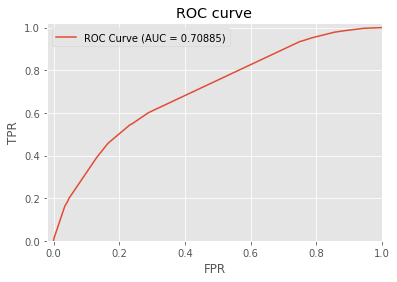

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.plot(results['roc_curve']['fpr'],
         results['roc_curve']['tpr'],
         label='ROC Curve (AUC = %0.5f)' %results['auc'])

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

In [ ]:
cls.classify(test)

class,probability
0,0.8785194084048271
0,0.8683233112096786
0,0.8393906801939011
0,0.7911533862352371
0,0.8293785452842712
0,0.8580630719661713
0,0.8445205390453339
0,0.8711102604866028
0,0.8502582460641861
0,0.8502582460641861


#Trying to lower the amount of people with no degree

In [ ]:
temp_df=df[df.science_degree == 0.0].sample(frac=0.91)
df=df.drop(temp_df.index)

In [ ]:
len(df[df['science_degree']==0.0])

12711

In [ ]:
len(df[df['science_degree']==1.0])

13553

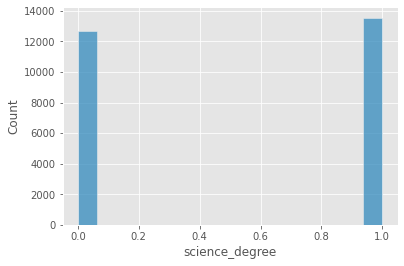

In [ ]:
sns.histplot(data=df, x="science_degree")

In [ ]:
sf = tc.SFrame(df)
sf['science_degree'] = sf['science_degree'].astype(int)

In [ ]:
test, train  = sf.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )

Train size 21051
Test size: 5213


In [ ]:
sf

AGEP,SEX,State,sex_recode,race_recode,detailed_hispanic_origin,science_degree,science_occupation
67,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,0,0
72,0,Alabama,Male,Black,NotSpanish/Hispanic/Latino ...,1,0
87,1,Alabama,Female,Other,NotSpanish/Hispanic/Latino ...,0,0
22,1,Florida,Female,Hispanic,Cuban,1,0
65,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,1,0
81,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,0,0
36,1,Alabama,Female,White,NotSpanish/Hispanic/Latino ...,1,0
38,1,Arkansas,Female,Other,NotSpanish/Hispanic/Latino ...,1,0
57,0,Alabama,Male,Black,NotSpanish/Hispanic/Latino ...,0,0
70,0,New_York,Male,White,NotSpanish/Hispanic/Latino ...,0,0


In [ ]:
features_list = ['AGEP', 'SEX', 'State', 'race_recode', 'detailed_hispanic_origin']
cls = tc.classifier.create(train,features=features_list, target="science_degree")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19998

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.020055     | 0.652665          | 0.662868            | 0.656290          | 0.656828            |

| 2         | 0.040434     | 0.652665          | 0.666667            | 0.636160          | 0.636203            |

| 3         | 0.060399     | 0.657166          | 0.663818            | 0.624718          | 0.626439            |

| 4         | 0.079940     | 0.663066          | 0.675214            | 0.614772          | 0.618364            |

| 5         | 0.097717     | 0.665166          | 0.680912            | 0.608581          | 0.613006            |

| 10        | 0.178800     | 0.675518          | 0.669516            | 0.595869          | 0.606234            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 19998

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.032350     | 0.651365          | 0.662868            | 0.617129          | 0.618295            |

| 2         | 0.055180     | 0.658366          | 0.671415            | 0.615877          | 0.614423            |

| 3         | 0.071847     | 0.658166          | 0.672365            | 0.616430          | 0.618511            |

| 4         | 0.090405     | 0.650165          | 0.657170            | 0.616668          | 0.619476            |

| 5         | 0.108207     | 0.656266          | 0.662868            | 0.615170          | 0.618411            |

| 10        | 0.174652     | 0.654365          | 0.667616            | 0.616409          | 0.617861            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 19998

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.024778     | 0.652665          | 0.662868            | 0.616274          | 0.618410            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 19998

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

Number of coefficients    : 80

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 3.000000  | 0.081361     | 0.618262          | 0.593542            |

| 1         | 8        | 0.750000  | 0.125113     | 0.626763          | 0.603989            |

| 2         | 14       | 1.774580  | 0.181080     | 0.635314          | 0.618234            |

| 3         | 15       | 1.774580  | 0.202786     | 0.639564          | 0.626781            |

| 4         | 20       | 0.676165  | 0.264315     | 0.636864          | 0.622032            |

| 9         | 39       | 1.278989  | 0.448509     | 0.639164          | 0.635328            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 19998

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

Number of coefficients      : 80

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.087560     | 0.648165          | 0.639126            |

| 2         | 3        | 0.116837     | 0.649315          | 0.636277            |

| 3         | 4        | 0.145317     | 0.649315          | 0.636277            |

| 4         | 5        | 0.177437     | 0.649315          | 0.636277            |

| 5         | 6        | 0.202919     | 0.649315          | 0.636277            |

| 9         | 10       | 0.304218     | 0.649315          | 0.636277            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.6695156695156695
PROGRESS: RandomForestClassifier          : 0.6676163342830009
PROGRESS: DecisionTreeClassifier          : 0.6628679962013295
PROGRESS: SVMClassifier                   : 0.6353276353276354
PROGRESS: LogisticClassifier              : 0.6362773029439696
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [ ]:
cls

Class                          : BoostedTreesClassifier

Schema
------
Number of examples             : 19998
Number of feature columns      : 5
Number of unpacked features    : 5
Number of classes              : 2

Settings
--------
Number of trees                : 10
Max tree depth                 : 6
Training time (sec)            : 0.1793
Training accuracy              : 0.6755
Validation accuracy            : 0.6695
Training log_loss              : 0.5959
Validation log_loss            : 0.6062
Training auc                   : 0.7427
Validation auc                 : 0.7291

In [ ]:
results = cls.evaluate(test)
results

{'accuracy': 0.6713984270093996,
 'auc': 0.7390253234648492,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  852  |
 |      0       |        0        |  1635 |
 |      1       |        1        |  1865 |
 |      1       |        0        |  861  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6852838508175638,
 'log_loss': 0.5997068262158272,
 'precision': 0.6864188443135811,
 'recall': 0.6841526045487895,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 2726 | 2487 |
 |   0.001   | 1.0 | 1.0 | 2726 | 2487 |
 |   0.002   | 1.0 | 

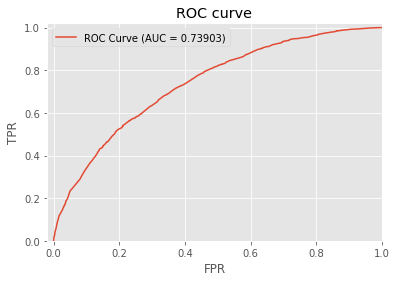

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.plot(results['roc_curve']['fpr'],
         results['roc_curve']['tpr'],
         label='ROC Curve (AUC = %0.5f)' %results['auc'])

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

In [ ]:
classification_list=cls.classify(test)

In [ ]:
cls.classify(test)

class,probability
0,0.655522346496582
1,0.5742663145065308
0,0.5701555907726288
0,0.9562211222946644
1,0.5411827564239502
1,0.5742663145065308
0,0.5192661285400391
0,0.8782138749957085
0,0.95128383487463
0,0.628627359867096


In [ ]:
classification_list['class']

dtype: int
Rows: 5213
[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, ... ]

In [ ]:
ratio_dict={}
for race,classification in zip(list(test['race_recode']),classification_list['class']):
  if race not in list(ratio_dict.keys()):
    ratio_dict[race]=0
    continue
  
  if classification==1:
    ratio_dict[race]=ratio_dict[race]+1

  


In [ ]:
ratio_dict

{'Black': 111, 'White': 1303, 'Other': 287, 'Hispanic': 423, 'Asian': 590}

In [ ]:
test

AGEP,SEX,State,sex_recode,race_recode,detailed_hispanic_origin,science_degree,science_occupation
57,0,Alabama,Male,Black,NotSpanish/Hispanic/Latino ...,1,0
71,0,Alabama,Male,White,NotSpanish/Hispanic/Latino ...,1,0
68,1,Alabama,Female,White,NotSpanish/Hispanic/Latino ...,0,0
20,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,0,0
54,1,New_York,Female,Other,NotSpanish/Hispanic/Latino ...,1,0
58,0,Alabama,Male,White,NotSpanish/Hispanic/Latino ...,0,0
59,0,Illinois,Male,Black,NotSpanish/Hispanic/Latino ...,0,0
22,0,Alabama,Male,Black,NotSpanish/Hispanic/Latino ...,0,0
20,0,Alabama,Male,Black,NotSpanish/Hispanic/Latino ...,1,0
40,1,Alabama,Female,Black,NotSpanish/Hispanic/Latino ...,1,0


In [ ]:
list(test['race_recode']).count('Black')

1111

In [ ]:
ratio_dict['Black']

111

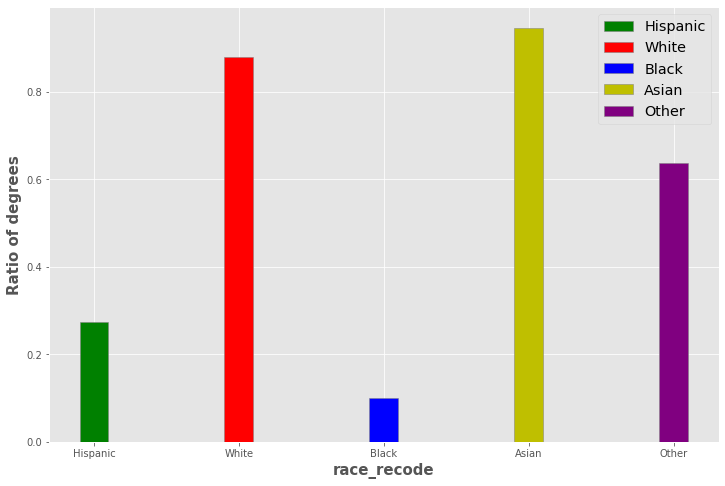

In [ ]:
barWidth = 1.0
fig = plt.subplots(figsize =(12, 8))

# set height of bar

br1=ratio_dict['Hispanic']/list(test['race_recode']).count('Hispanic')
br2=ratio_dict['White']/list(test['race_recode']).count('White')

br3=ratio_dict['Black']/list(test['race_recode']).count('Black')
br4=ratio_dict['Asian']/list(test['race_recode']).count('Asian')
br5=ratio_dict['Other']/list(test['race_recode']).count('Other')

# Make the plot
plt.bar(10, br1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Hispanic')
plt.bar(15, br2, color ='r', width = barWidth,
        edgecolor ='grey', label ='White')
plt.bar(20, br3, color ='b', width = barWidth,
        edgecolor ='grey', label ='Black')
plt.bar(25, br4, color ='y', width = barWidth,
        edgecolor ='grey', label ='Asian')
plt.bar(30, br5, color ='purple', width = barWidth,
        edgecolor ='grey', label ='Other')
 
# Adding Xticks
plt.xlabel('race_recode', fontweight ='bold', fontsize = 15)
plt.ylabel('Ratio of degrees', fontweight ='bold', fontsize = 15)

plt.xticks([10,15,20,25,30],['Hispanic', 'White','Black','Asian','Other'])
plt.legend(fontsize="x-large")
plt.show()

In [ ]:
len(df)

26264